<a href="https://colab.research.google.com/github/SalvadorRdR/IAC_2022/blob/salvador/Modelo_IGRF_13_IAC2022_SR_8_10_2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [1]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


In [2]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!git clone https://github.com/klaundal/ppigrf.git #Hacemos la clonacion de la libreria PPIGRF

Cloning into 'ppigrf'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 65 (delta 36), reused 34 (delta 14), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [4]:
import ppigrf

#Data

In [5]:
from datetime import datetime
h   = 560       # kilometers above sea level
date = datetime(2013, 10, 8) #El dia del estudio

Los intervalos de la latitus y longitud que se quiere simular
$$Slice (Lat_{min} , Lat_{max} +dy ,dy) $$
$$Slice (Lon_{min} , Lon_{max} +dx ,dx) $$

In [8]:
#Y-->Latitud
#X-->Longitud
dx, dy = 0.1, 0.1                  # Resolución de cada punto, 
Lat, Lon = np.mgrid[slice(-56, 23 + dy, dy), # Se crea un espacio 2D con puntos, de separación dx y dy
                slice(-111, 16 + dx, dx)]

In [9]:
Be, Bn, Bu = ppigrf.igrf(Lon,Lat, h, date)

In [10]:
Bt=np.sqrt(Be**2+Bn**2+Bu**2) #Sacamos el modulo de Bt de cada punto
Bt=np.squeeze(Bt)

##Plot

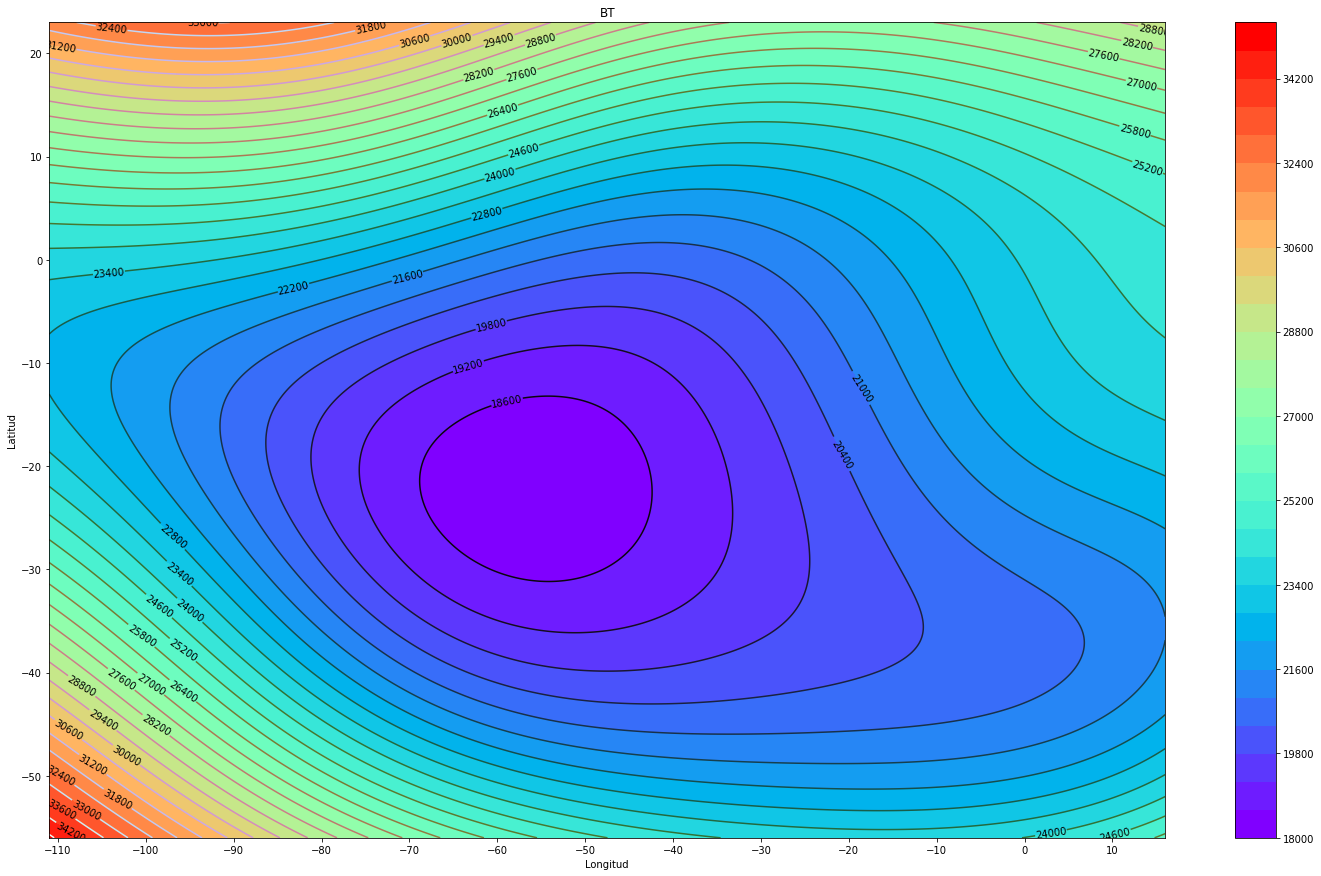

In [12]:

levels = MaxNLocator(nbins=30).tick_values(Bt.min(), Bt.max())
cmap = plt.get_cmap('rainbow')                             # Tipo de mapa
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)  # Incluimos las valores para el borde del gráfico


fig, ax = plt.subplots(figsize = (25,15))

im = ax.pcolormesh(Lon, Lat, Bt, cmap=cmap, norm=norm)
cs = plt.contour(Lon, Lat, Bt, range(17500, 25500, 500), levels = 30,cmap = plt.cm.cubehelix)
plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=10, colors='k')
fig.colorbar(im, ax=ax)
ax.set_title('BT')
plt.xticks(range(-110,11,10))
plt.xlabel("Longitud", size = 10)
plt.ylabel("Latitud", size = 10)
plt.show()

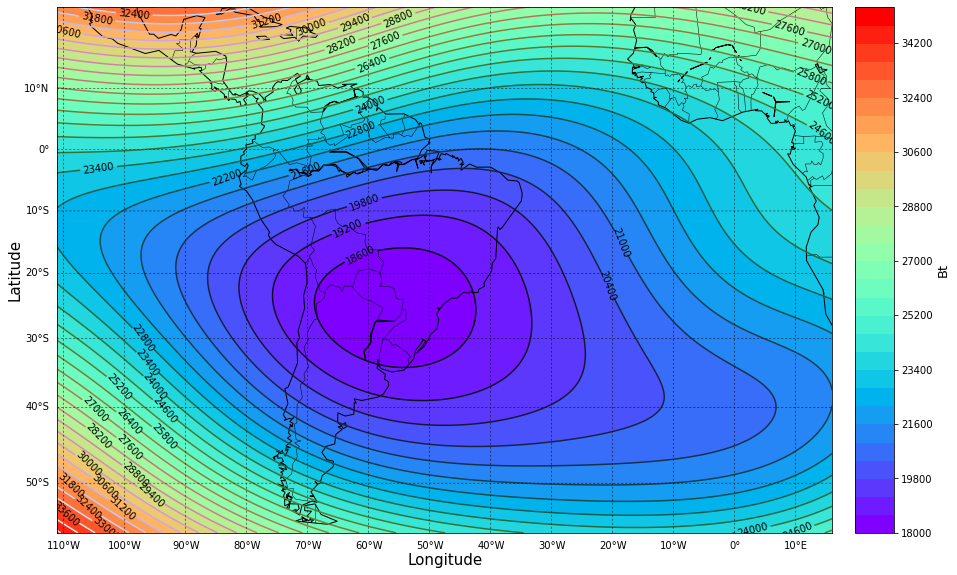

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from osgeo import gdal
from numpy import linspace
from numpy import meshgrid


fig = plt.figure(figsize = (15,15))
map = Basemap(projection='mill', 
              lat_0=-55+(17+55)/2, lon_0= -105+(16+105)/2,
              llcrnrlon=-111, 
              llcrnrlat=-56, 
              urcrnrlon=16, 
              urcrnrlat=23,resolution='c')
map.drawcoastlines()
map.drawcountries(linewidth=0.5)
map.drawmeridians(range(-120, 20, 10), color='k', linewidth=.5, dashes=[4, 4], labels=[0, 0, 0, 1])
map.drawparallels(range(-60, 20, 10), color='k', linewidth=.5, dashes=[4, 4], labels=[1, 0, 0, 0])
#map.fillcontinents(color='coral',lake_color='aqua')

data=Bt

x = linspace(0, map.urcrnrx, data.shape[1])
y = linspace(0, map.urcrnry, data.shape[0])

xx, yy = meshgrid(x, y)

im=map.pcolormesh(xx, yy, data,cmap=cmap, norm=norm)
cs = map.contour(xx, yy, data, range(17500, 25500, 500), levels = 30,cmap = plt.cm.cubehelix)
cbar = map.colorbar(im, location='right', pad="3%")
cbar.set_label('Bt', fontsize=13)
plt.clabel(cs, inline=True, fmt='%1.0f', fontsize=10, colors='k')

plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)


plt.show()

In [14]:
Lon.shape,Lat.shape, Bt.shape

((791, 1271), (791, 1271), (791, 1271))

#Date Frame

In [15]:
df = pd.DataFrame(Bt,index=Lat[:,0],columns=Lon[0,:]) #Donde cada "y" representa el valor de cada posicion de la Latitud y el "x" representa cada valor de la Longitud.... [Lat,Lon]=Campo magentico(Btij) en ese punto 
print('DataFrame:')
print(df)

DataFrame:
             -111.0        -110.9        -110.8        -110.7        -110.6  \
-56.0  34919.847517  34898.708091  34877.559702  34856.402429  34835.236353   
-55.9  34883.087666  34861.924812  34840.752930  34819.572102  34798.382406   
-55.8  34846.316119  34825.130135  34803.935060  34782.730973  34761.517955   
-55.7  34809.533422  34788.324605  34767.106634  34745.879587  34724.643545   
-55.6  34772.740111  34751.508762  34730.268193  34709.018485  34687.759718   
...             ...           ...           ...           ...           ...   
 22.6  31972.772007  31980.992322  31989.185876  31997.352466  32005.491888   
 22.7  32018.147257  32026.391144  32034.608172  32042.798139  32050.960842   
 22.8  32063.545719  32071.812985  32080.053297  32088.266451  32096.452244   
 22.9  32108.966762  32117.257215  32125.520619  32133.756768  32141.965460   
 23.0  32154.409756  32162.723203  32171.009506  32179.268459  32187.499859   

             -110.5        -110.4       

In [16]:
df.to_csv('MagneticField_T.csv',sep='\t')
!cp data.csv "drive"

cp: cannot stat 'data.csv': No such file or directory


In [17]:
file_name='modelo-igrf13-ctic.xlsx'
df.to_excel(file_name)